# Watershed Algorithm
## Using Existing Known Methods

In [204]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [205]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

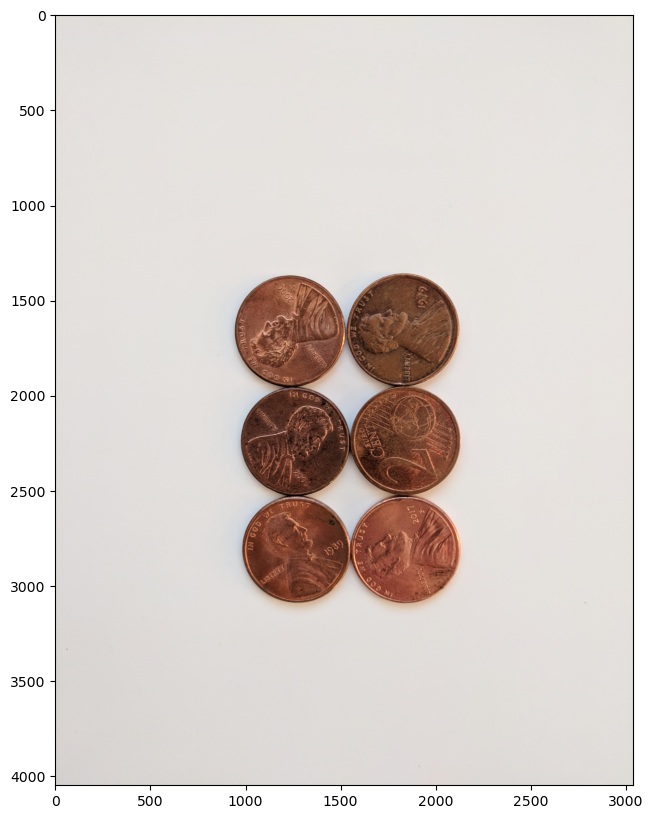

In [206]:
sep_coins = cv2.imread('../DATA/pennies.jpg')
sep_coins = cv2.cvtColor(sep_coins, cv2.COLOR_BGR2RGB)
display(sep_coins)

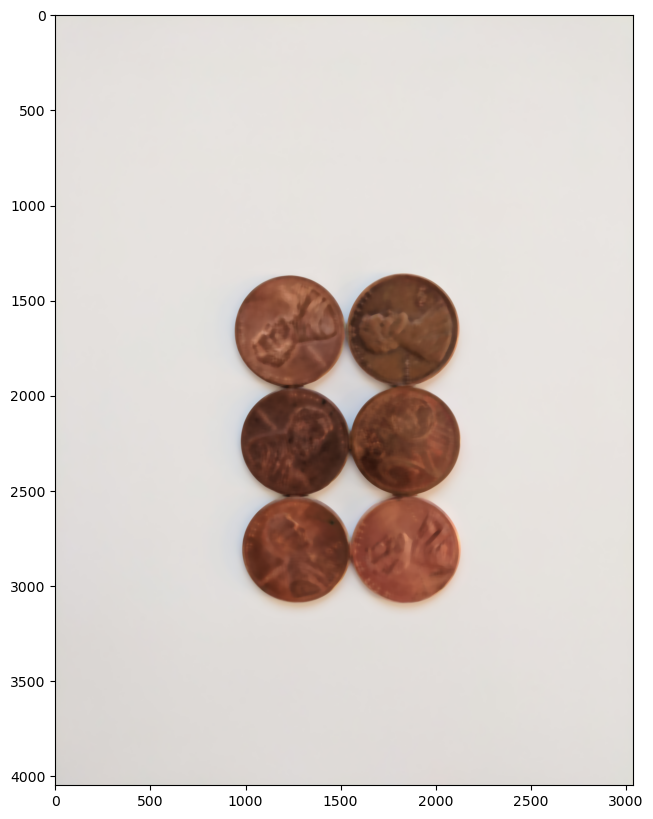

In [207]:
# Median Blur
sep_blur = cv2.medianBlur(sep_coins, 25)
display(sep_blur)

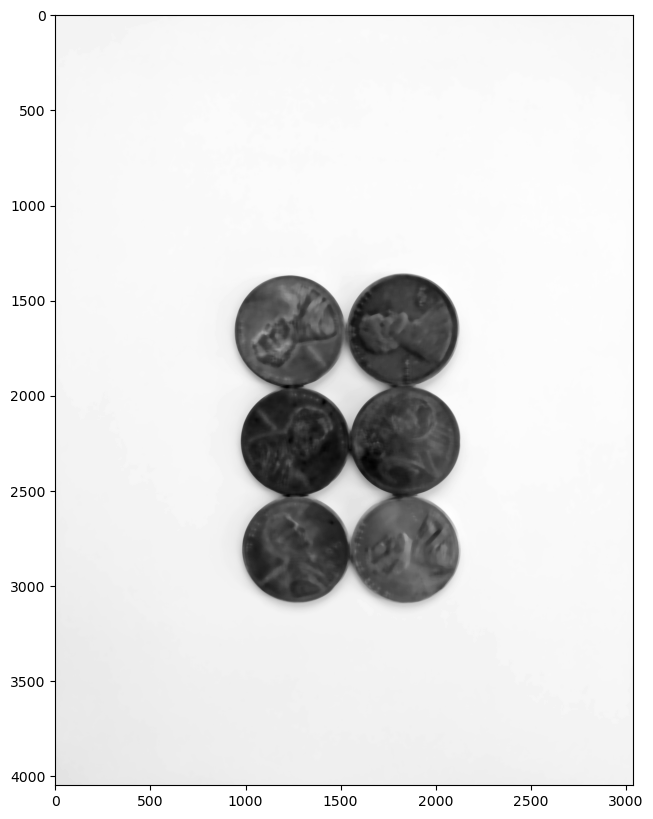

In [208]:
# Grayscale
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_RGB2GRAY)
display(gray_sep_coins)

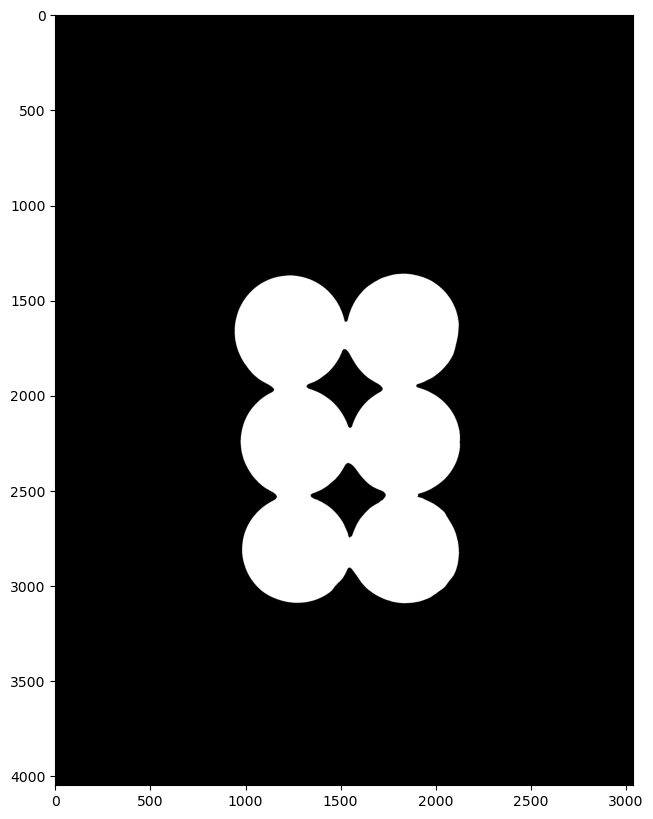

In [209]:
# Binary Threshold
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)
display(sep_thresh)

In [210]:
# Find contours
contour_copy = sep_thresh.copy()
contours, hierarchy = cv2.findContours(contour_copy, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [-1,  1, -1,  0]]], dtype=int32)

In [211]:
for i in range(len(contours)):
    # External Contours
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

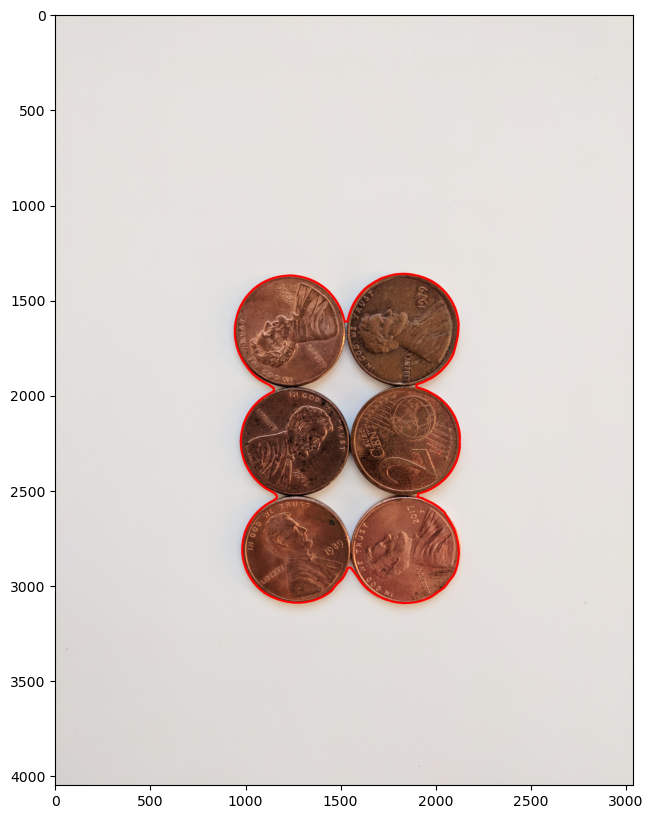

In [212]:
# External Contours
display(sep_coins)

In [213]:
sep_coins_2 = cv2.imread('../DATA/pennies.jpg')
sep_coins_2 = cv2.cvtColor(sep_coins_2, cv2.COLOR_BGR2RGB)
for i in range(len(contours)):
    # Internal Contours
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(sep_coins_2, contours, i, (0, 0, 255), 10)

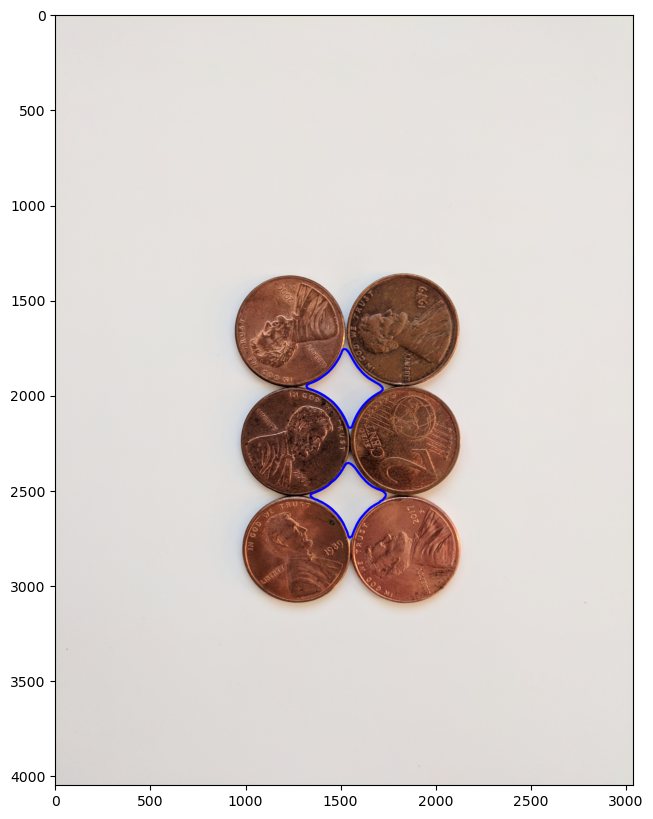

In [214]:
display(sep_coins_2)

## Watershed Algorithm

In [215]:
# Read Image
img = cv2.imread('../DATA/pennies.jpg')

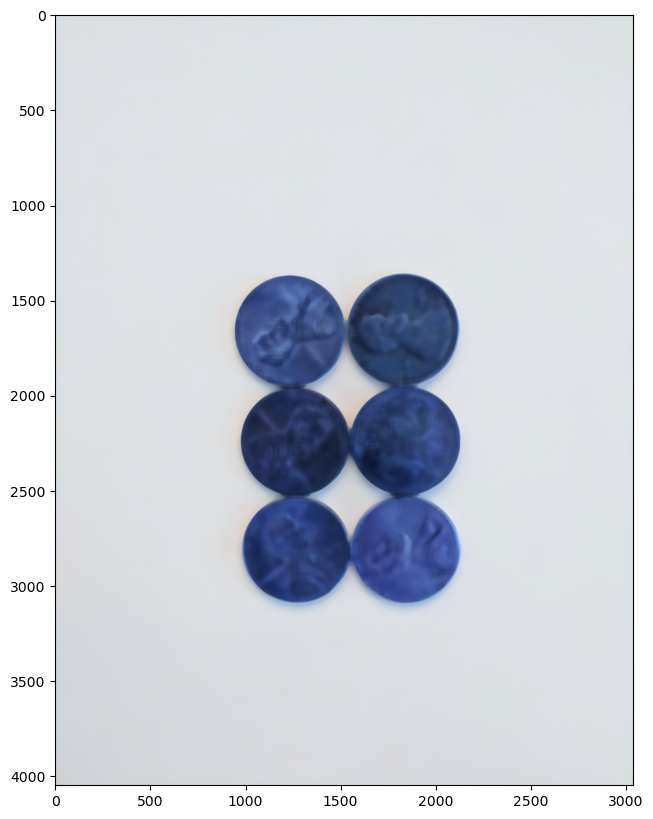

In [216]:
# Blur
img = cv2.medianBlur(img, 35)
display(img)

In [217]:
# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

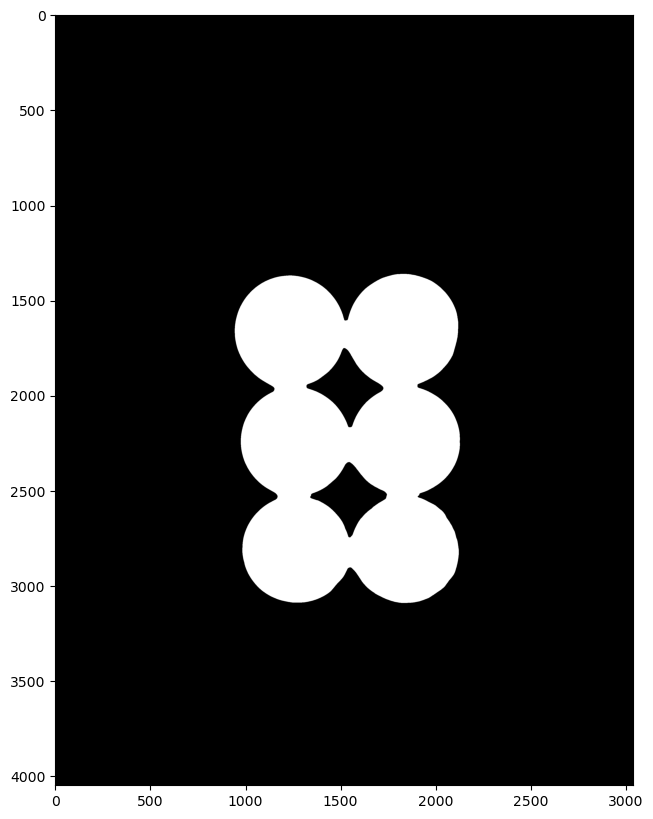

In [218]:
# Threshold with Otsu's Method
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)

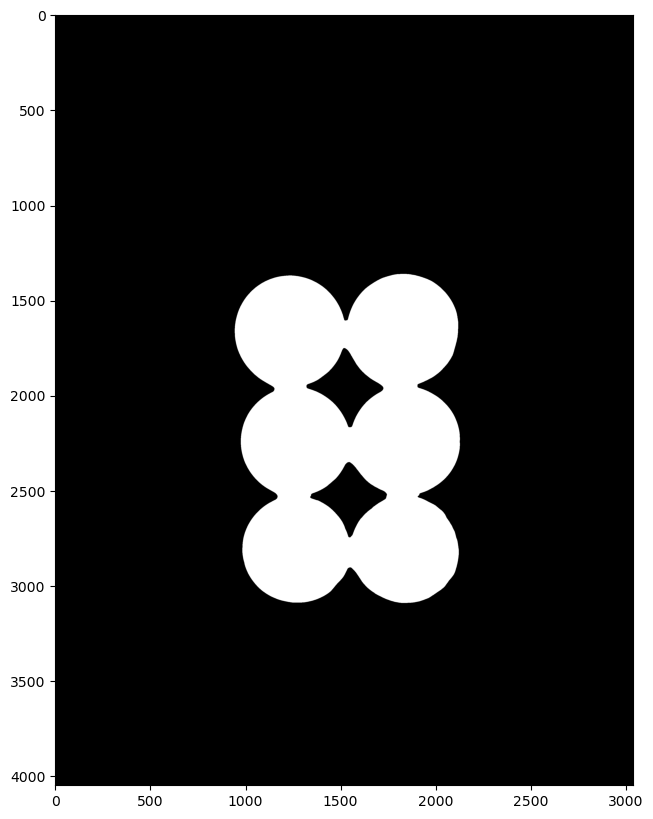

In [219]:
# Noise Removal
kernel = np.ones((3,3), np.uint8)
# Opening
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
display(opening)

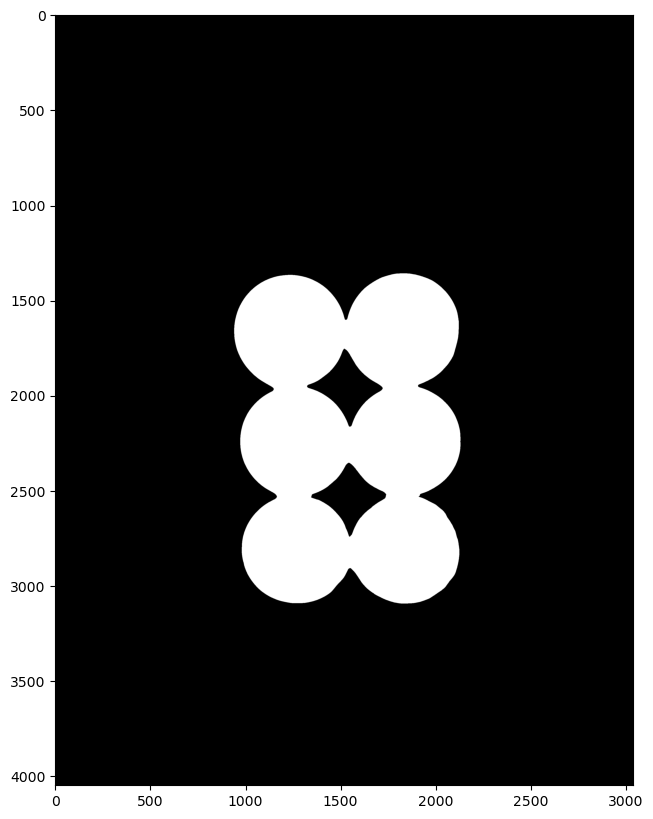

In [227]:
# Sure Background Area
sure_bg = cv2.dilate(opening, kernel, iterations=3)
display(sure_bg)

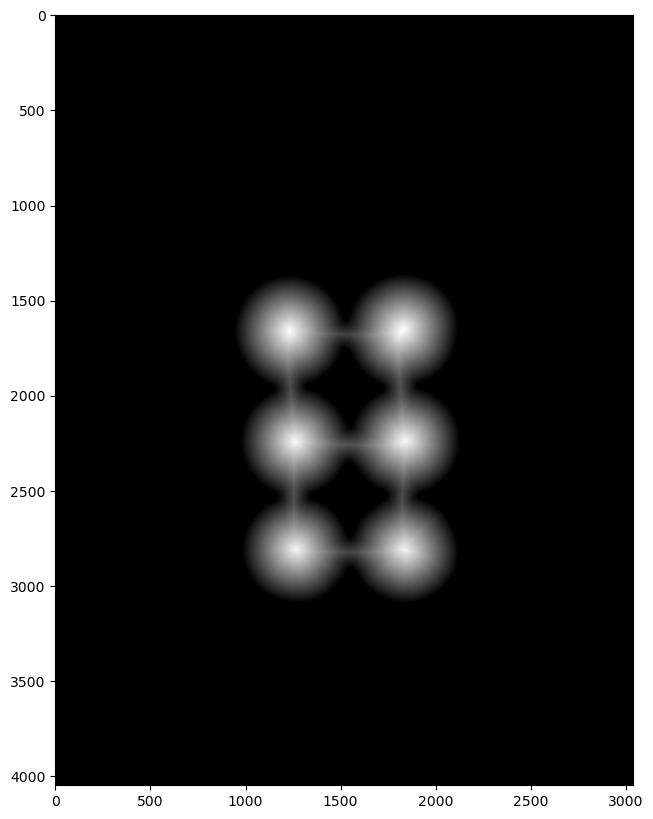

In [220]:
# Distance Transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
display(dist_transform)

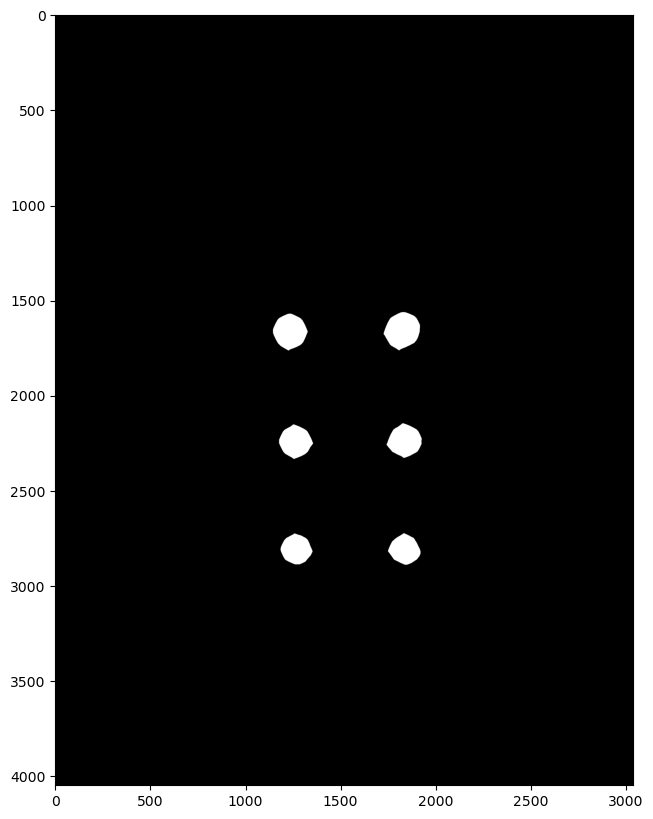

In [221]:
# Threshold to find sure foreground
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
display(sure_fg)

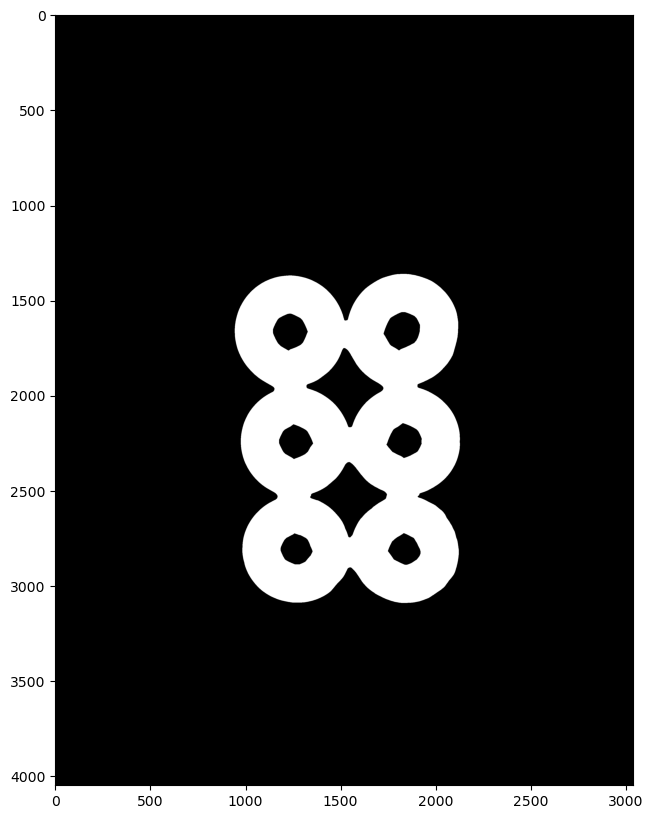

In [222]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(opening, sure_fg)
display(unknown)

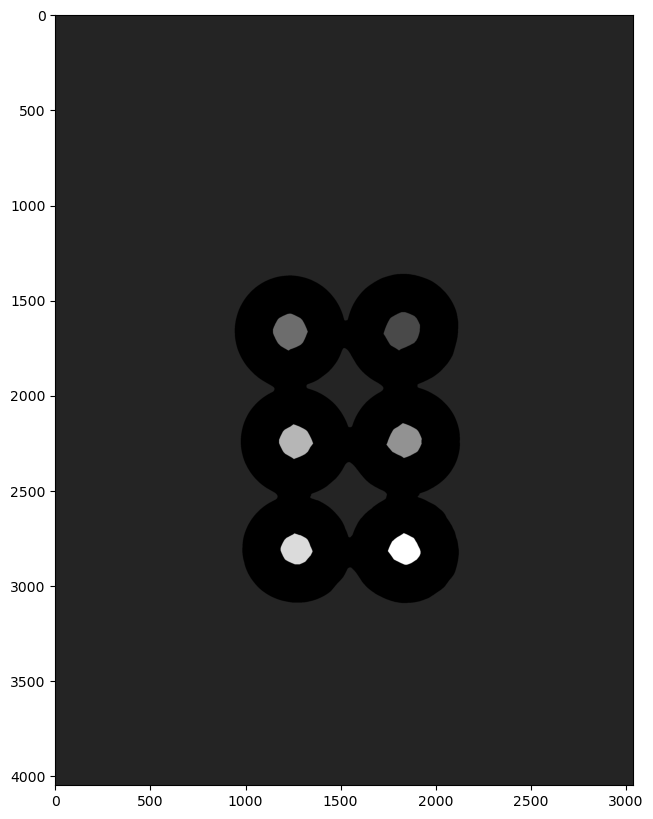

In [223]:
# Marker Labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1 # So that background is not 0, but 1
markers[unknown == 255] = 0
display(markers)

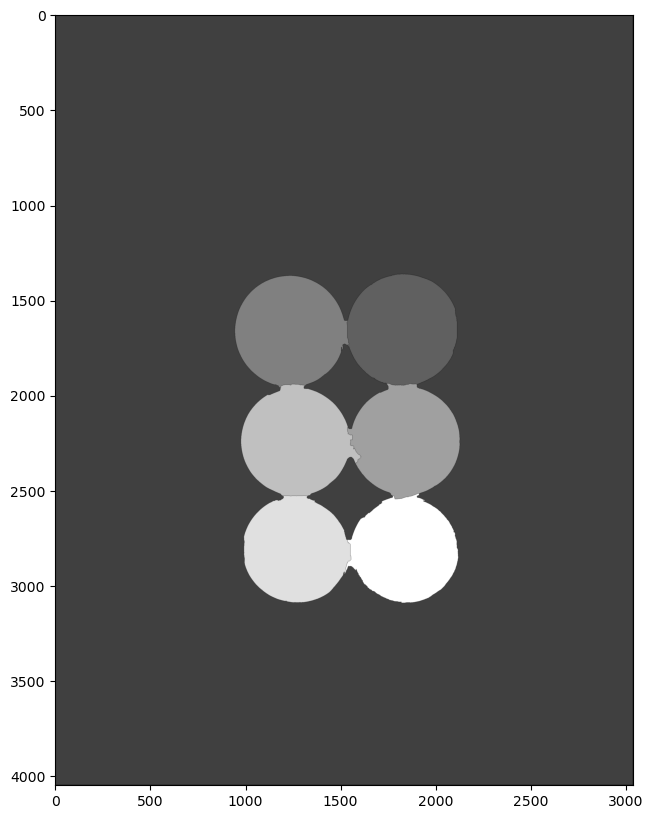

In [224]:
# Watershed
markers = cv2.watershed(img, markers)
display(markers)

In [225]:
# Contours
img = cv2.imread('../DATA/pennies.jpg')
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (255, 0, 0), 10)

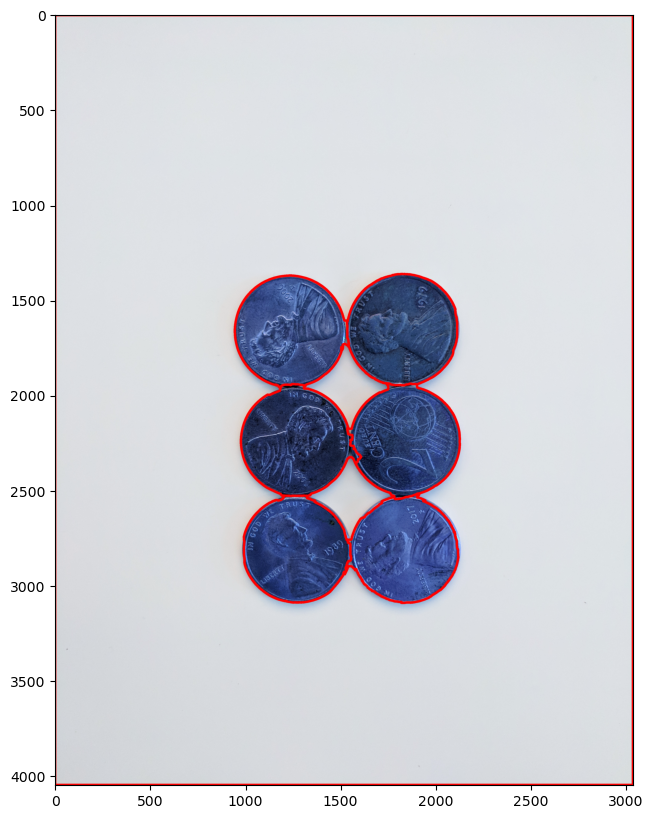

In [226]:
# Result
display(img)
